**Practical 9**

**Aim: Principal Component Analysis (PCA)**

**a) Perform PCA on a dataset to reduce dimensionality.**

**b) Evaluate the explained variance and select the appropriate number of principal components.**

**c) Visualize the data in the reduced-dimensional space.**

**T114 | Bhumika Shelar**

**Using principal component analysis with scikit's PCA:**

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
df = pd.read_csv("/content/Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1.0,03/05/2020,97.0,1.0,65.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
1,2,1,2,1.0,03/06/2020,97.0,1.0,72.0,97.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2.0,09/06/2020,1.0,2.0,55.0,97.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2,1,1,1.0,12/06/2020,97.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
4,2,1,2,1.0,21/06/2020,97.0,2.0,68.0,97.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0


In [26]:
import numpy as np

# Select only numerical columns for PCA
df_numeric = df.select_dtypes(include=np.number)

# Handle missing values: drop rows with NaNs
df_numeric_cleaned = df_numeric.dropna()

# Standardize the feature matrix
X = StandardScaler().fit_transform(df_numeric_cleaned)

# Create a PCA that will retain 99% of the varience
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pcs = pca.fit_transform(X)

In [27]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pcs.shape[1])

Original number of features: 20
Reduced number of features: 16


**Reducing Features When Data Is Linearly Inseparable**

In [28]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [29]:
X, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

In [30]:
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
X_kpca = kpca.fit_transform(X)

In [31]:
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kpca.shape[1])

Original number of features: 2
Reduced number of features: 1


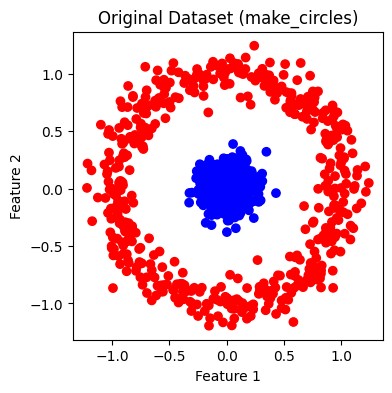

In [61]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

# Create dataset
X, y = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

# PCA (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Kernel PCA (2 components)
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=2)
X_kpca = kpca.fit_transform(X)

# Colors based on label
colors = ['red' if label == 0 else 'blue' for label in y]
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=colors)
plt.title("Original Dataset (make_circles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


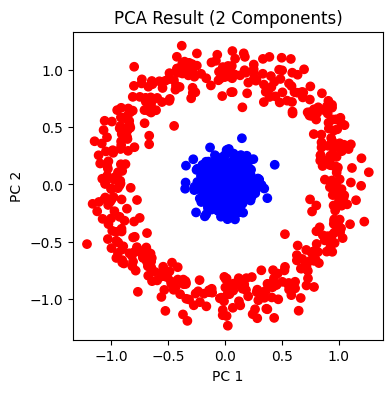

In [60]:
plt.figure(figsize=(4,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors)
plt.title("PCA Result (2 Components)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


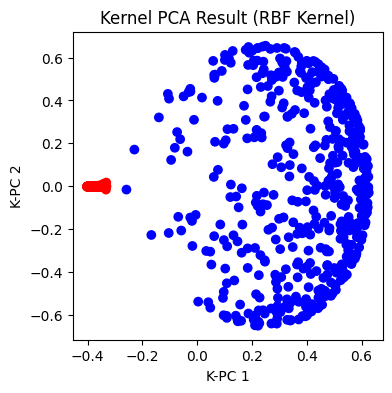

In [63]:
plt.figure(figsize=(4,4))
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=colors)
plt.title("Kernel PCA Result (RBF Kernel)")
plt.xlabel("K-PC 1")
plt.ylabel("K-PC 2")
plt.show()

**Kernel PCA**

**Reducing Features by Maximizing Class Separability**

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [44]:
X = df.drop('PNEUMONIA', axis=1)
y = df['PNEUMONIA']

In [45]:
X_processed = X.copy()
y_processed = y.copy()

if 'DATE_DIED' in X_processed.columns:
    X_processed = X_processed.drop('DATE_DIED', axis=1)

X_processed = X_processed.select_dtypes(include=np.number)
combined_data_clean = pd.concat([X_processed, y_processed], axis=1).dropna()
target_col_name = 'PNEUMONIA'

if target_col_name in combined_data_clean.columns:
    X_lda_input = combined_data_clean.drop(target_col_name, axis=1)
    y_lda_input = combined_data_clean[target_col_name]
    y_lda_input = y_lda_input.astype(int)

    lda = LinearDiscriminantAnalysis(n_components=1)
    X_lda = lda.fit_transform(X_lda_input, y_lda_input)
else:
    print(f"Error: Target column '{target_col_name}' not found after cleaning. Check original 'y' or column name.")

In [46]:
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 20
Reduced number of features: 1


In [47]:
lda.explained_variance_ratio_

array([0.62547269])

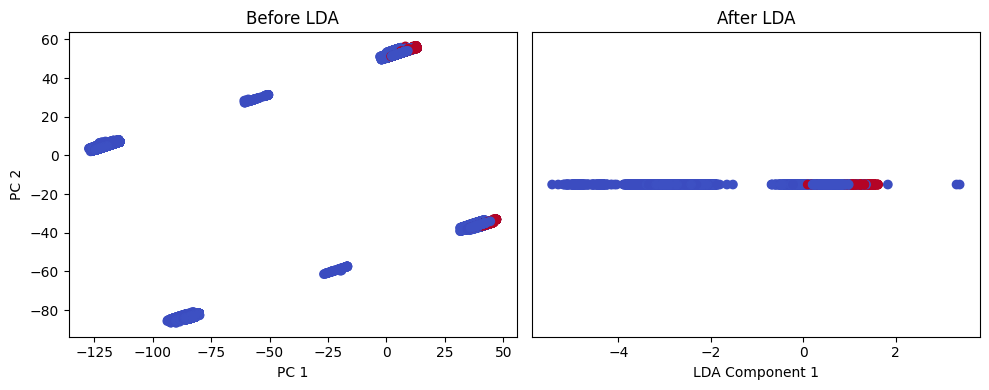

In [72]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

# Prepare data
X_clean = combined_clean.drop('PNEUMONIA', axis=1)
y_clean = combined_clean['PNEUMONIA'].astype(int)

# PCA for Before LDA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

# LDA for After LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_clean, y_clean)

plt.figure(figsize=(10,4))

# Before LDA
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_clean, cmap='coolwarm')
plt.title("Before LDA")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

# After LDA
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:,0], [0]*len(X_lda), c=y_clean, cmap='coolwarm')
plt.title("After LDA")
plt.xlabel("LDA Component 1")
plt.yticks([])

plt.tight_layout()
plt.show()
